Let's start with some examples in Python.  Python is a simple computer language that has relatively cleaner syntax than other languages.  Here are some examples.  Click in a cell and press control-enter to run and see the output.

In [1]:
bob = 0                              # bob is a "variable"
print bob

0


In [2]:
bob = bob + 1                        # variable values can be changed
print bob

1


In [3]:
for x in range(0,3):                 # this is a "for loop"
    print x

0
1
2


In [4]:
for row in range(0,3):
    for  col in range(0,2):          # you can have loops inside loops
        print row,col                # we'll do this to operate on images

0 0
0 1
1 0
1 1
2 0
2 1


In [5]:
fruits=["apple","orange","banana"]  # this is a "list" 
print fruits[0]                     # this is the first value, at index 0

apple


In [6]:
fruits[1]="mango"                   # you can change a value in a list
print fruits                        # you can print a list

['apple', 'mango', 'banana']


In [7]:
print "Shopping List:"
for f in fruits:                    # you can loop over lists
    print f

Shopping List:
apple
mango
banana


In [8]:
def near(x,y):                     # you can create your own functions
    if abs(x-y)<10:                 # absolute value.. abs(3)=abs(-3)=3
        return True
    return False

print near(3,20)                   # are 3 and 20 close?

False


In [9]:
print near(3,5)

True


Let's do stuff with images now!  This first step just loads libraries (collections of pre-written code) that are useful in processing images and video.

In [10]:
import cv2                        # OpenCV computer vision library
import matplotlib                 # for plotting and showing images
import matplotlib.pyplot as plt   # alias to plotting functions 
import matplotlib.image as mpimg  # alias for image functions
import numpy as np                # matrix data and operations
import time                       # useful to stopwatch-time our code
import os                         # basic stuff with files and directories
import PIL as pil                 # another simple image library
font = cv2.FONT_HERSHEY_SIMPLEX   # allows writing onto images
                                  # inline means show stuff here vs popup
%matplotlib inline
matplotlib.rcParams['figure.figsize']=(7,7)
os.chdir("C:/Users/gjohn/Dropbox/Teaching/splash-vision")
#os.chdir("/home/gj/Dropbox/teaching/splash-vision")

print(os.getcwd())                 # be sure we're in the right directory
print("OpenCV Version "+cv2.__version__)   # check our version of OpenCV

C:\Users\gjohn\Dropbox\Teaching\splash-vision
OpenCV Version 3.2.0


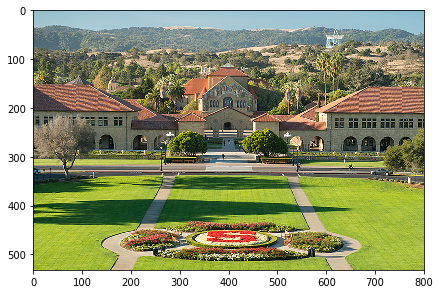

In [11]:
# Load a color image and show it
stanford = mpimg.imread('stanford.jpg')
plt.imshow(stanford, aspect='equal')
plt.show()

In [12]:
stanford[0][0]                      #value of the upper left corner pixel

array([146, 190, 203], dtype=uint8)

above, the color [146,190,203] is a list where 146 is the amount of red (on a scale of 0 to 255), 190 is the amount of green, and 203 is the amount of blue.  So it's mostly blue but there's a lot of light generally, giving a light blue color. 

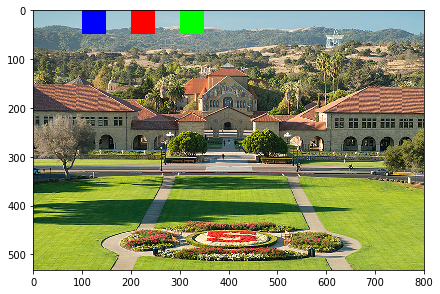

In [13]:
blue = np.array([0,0,255])          #0, 0, 255 means no red, no green, as much blue as possible
red = np.array([255,0,0])
green = np.array([0,255,0])
for row in range(0,50):             #this loops over rows 0 to 49
    for col in range(100,150):         #and sets columns 100 to 149
        stanford[row][col] = blue       #to blue
    for col in range(200,250):         #and sets columns 200 to 249
        stanford[row][col] = red        #to red
    for col in range(300,350):
        stanford[row,col] = green
plt.imshow(stanford)
plt.show()

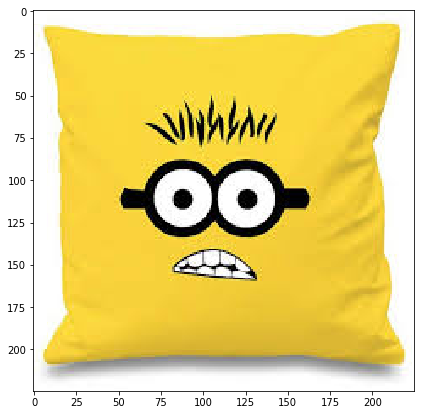

In [14]:
minion = mpimg.imread('minion-simple.jpg')
plt.imshow(minion)
plt.show()

In [15]:
print minion[50,50]                     #this is the yellow color at row 50, column 50

[250 217  60]


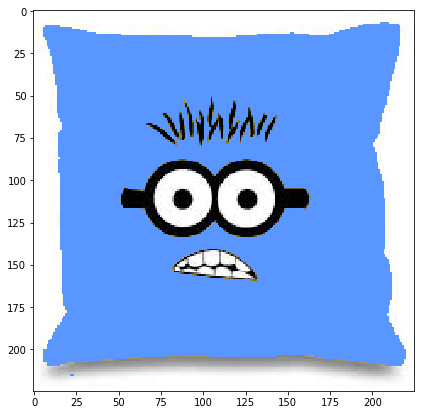

In [16]:
def near(color1, color2):         #colors are "near" when .. 
    diff = 0
    for i in range(0,3):
        diff = diff + abs(color1[i]-color2[i])  # the sum of the difference of each color (RGB)
    if diff <= 180:                             # is less than 180 
        return True
    return False

minion = mpimg.imread('minion-simple.jpg')
yellow = np.array([250,217,60])                 # this is our reference yellow color
blue = np.array([90,150,255])                   # this is a nice blue color
for r in range(0,220):
    for c in range(0,220):
        if near(minion[r][c],np.array([250, 217, 60])):
            minion[r][c] = blue
plt.imshow(minion)
plt.show()

In [17]:
def fix(color):
    for i in range(0,3):
        if color[i]<0:
            color[i]=0
        elif color[i]>255:
            color[i]=255
    return color

print fix(np.array([300, -10, 50]))

[255   0  50]


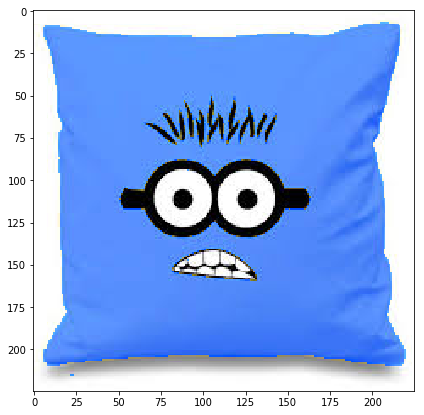

In [18]:
minion = mpimg.imread('minion-simple.jpg')
yellow = np.array([250,217,60])
blue = np.array([90,150,255])

for r in range(0,220):
    for c in range(0,220):
        if near(minion[r][c],yellow):
            minion[r][c] = fix(minion[r][c]-yellow+blue)
plt.imshow(minion)
plt.show()

The code below opens a connection to the default **video capture device** and displays its output in a window

In [19]:
cap = cv2.VideoCapture(0)
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 320)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 240)
    
while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()
    # Our operations on the frame come here
    #gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Display the resulting frame
    cv2.imshow('frame',frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

before running the code below, I put my thumb over the camera so it was just getting a video of my skin color.. 

In [20]:
cap = cv2.VideoCapture(0)
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 160)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 120)
cap.set(cv2.CAP_PROP_FPS,30)
start = time.clock()
times=[]
reds=[]
for i in range(40):
    ret, frame = cap.read()
    redsum=0.0
    if ret:
        for r in range(100):
            for c in range(100):
                redsum += frame[r][c][2]
    reds.append(redsum/10000)
    times.append(time.clock())
if ret:
    print len(frame),len(frame[0])
print time.clock()-start, "seconds", len(reds), "samples"
cap.release()
cv2.destroyAllWindows()

120 160
5.48455637904 seconds 40 samples


In [ ]:
from VideoCapture import Device

40


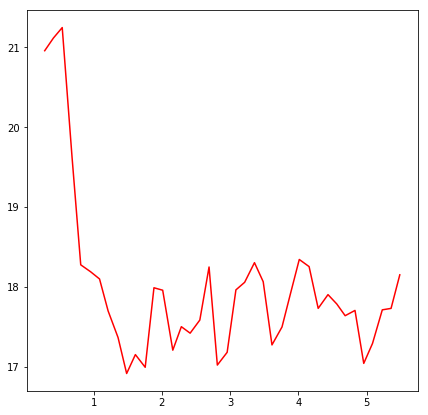

In [21]:
plt.plot(times,reds,'r')
print len(reds)

The graph shows the amount of red, averaged over a large area of the camera's visual field (10,000 pixels).  The graph shows an upward spike every second or so, but the overall graph has an odd shape, because I was slightly (not intentionally) varying the pressue of my thumb against the webcam.  Below I compute a moving average of the signal and then subtract it from the signal to focus on just the pulse

In [22]:
def smoothed(l,width):
    smoothed=list(l)
    for i in range(width,len(l)-width):
        smoothed[i]=sum(smoothed[i-width:i+width+1])*1.0/(2*width+1) 
    return smoothed

print smoothed([1,0,1,0,1,0,1,0],2)

[1, 0, 0.6, 0.32, 0.584, 0.38079999999999997, 1, 0]


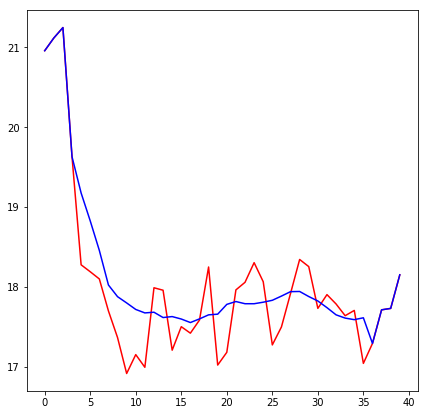

In [23]:
plt.plot(reds,'r')
plt.plot(smoothed(reds,4),'b')

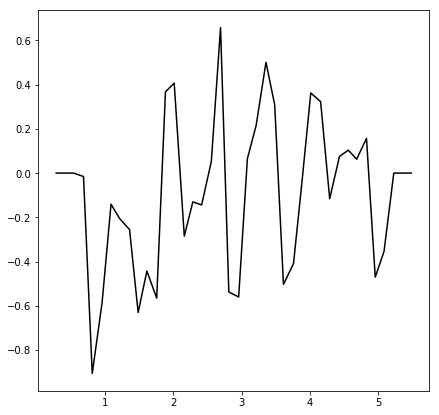

In [24]:
r=np.array(reds)
mavg = np.array(smoothed(reds,3))
diff=r-mavg
plt.plot(times,diff,'black')

It's fascinating that the difference between the top and the bottom is just 1 or 2 units of red on a scale of 0 to 255. Imperceptible to a human but still perceptible to the computer.  For example here is a square where the left half has red value 190 and the right half has red value 191.  

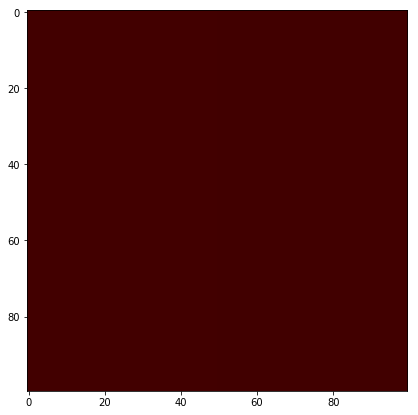

In [25]:
row = np.array([[150,0,0]]*2+[[153,0,0]]*2)
img = np.zeros([100,100,3])
img.shape
for row in range(0,100):
    for col in range(0,50):
        img[row][col]=[190,0,0]
    for col in range(50,100):
        img[row][col]=[191,0,0]
        
plt.imshow(img)

since you know the left half is different from the right half, you can probably just barely detect the difference, but you wouldn't be able to detect the change in color from the slightly brigther to the slightly darker red

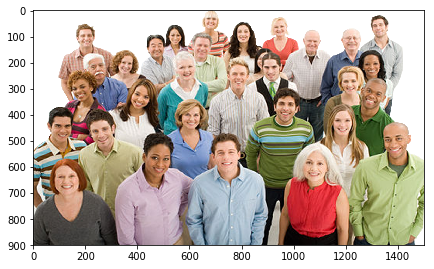

In [27]:
img = mpimg.imread('peeps.jpg')
plt.imshow(img)
plt.show()

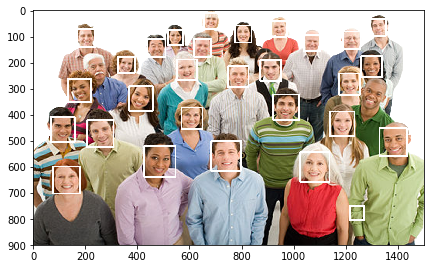

In [28]:
facedetect = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
img = mpimg.imread('peeps.jpg')
faces = facedetect.detectMultiScale(
    cv2.cvtColor(img, cv2.COLOR_BGR2GRAY),
    scaleFactor=1.1,
    minNeighbors=6,
    minSize=(30, 30)
)
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0,0,0), 5,3)
plt.imshow(img)
plt.show()

In [ ]:
#another approach is to filter for skin tone
#from https://arxiv.org/pdf/1212.2692.pdf
def skin(r,g,b):
    skin=0;
    if 